In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Baca data dari file CSV
data = pd.read_excel('data kesehatan.xlsx')
data=data.drop_duplicates()
# Pisahkan data berdasarkan nilai "Siap Diving"
data_diving_1 = data[data["Siap Diving"] == 1]
data_diving_0 = data[data["Siap Diving"] == 0]

# Ambil 30 baris acak dari data yang "Siap Diving" == 0
data_diving_0_sampled = data_diving_0.sample(n=22, random_state=42)

# Gabungkan data yang "Siap Diving" == 1 dan yang sudah disampling
data_final = pd.concat([data_diving_1, data_diving_0_sampled])

data_baru = {
    "Masalah Pernafasan/Jantung/Covid": [0,0,0,1,1,1,1],
    "Umur > 45 Tahun": [0,0,0,1,1,1,1],
    "Tidak Dapat Olahraga Ringan": [1,0,0,0,1,1,0],
    "Masalah Mata/Telinga/Sinus": [0,0,0,1,1,1,1],
    "Operasi Terakhir 12 Bulan": [0,1,0,1,0,1,0],
    "Masalah Neurologis": [0,0,0,1,1,1,1],
    "Perawatan Psikologis": [0,0,0,1,1,1,1],
    "Masalah Punggung/Diabetes": [0,0,0,1,1,1,1],
    "Masalah Perut/Usus": [0,0,0,1,1,1,1],
    "Mengonsumsi Obat": [0,0,1,1,1,0,0],
    "Siap Diving": [0,0,0,0,0,0,1],
}
data_baru_df = pd.DataFrame(data_baru)

data_baru_df

,Masalah Pernafasan/Jantung/Covid,Umur > 45 Tahun,Tidak Dapat Olahraga Ringan,Masalah Mata/Telinga/Sinus,Operasi Terakhir 12 Bulan,Masalah Neurologis,Perawatan Psikologis,Masalah Punggung/Diabetes,Masalah Perut/Usus,Mengonsumsi Obat,Siap Diving
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,1,1,1,1,1,1,1,0
4,1,1,1,1,0,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,1,0,0
6,1,1,0,1,0,1,1,1,1,0,1


In [4]:
# Menambahkan data baru ke data_final
data_final = pd.concat([data_final, data_baru_df], ignore_index=True)
data_final =data_final.drop_duplicates()
data_final["Siap Diving"].value_counts()

Siap Diving
0    28
1    23
Name: count, dtype: int64

In [5]:
data_final

,Masalah Pernafasan/Jantung/Covid,Umur > 45 Tahun,Tidak Dapat Olahraga Ringan,Masalah Mata/Telinga/Sinus,Operasi Terakhir 12 Bulan,Masalah Neurologis,Perawatan Psikologis,Masalah Punggung/Diabetes,Masalah Perut/Usus,Mengonsumsi Obat,Siap Diving
0,0,1,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,1,1,0,0,1
3,1,0,0,1,0,1,1,0,1,0,1
4,0,0,0,0,0,0,1,1,1,0,1
5,1,1,0,1,0,0,0,1,0,0,1
6,0,1,0,1,0,0,1,1,1,0,1
7,1,0,0,1,0,1,1,1,1,0,1
8,1,0,0,1,0,0,1,1,1,0,1
9,0,1,0,1,0,1,0,0,1,0,1


In [7]:
X = data_final.drop(columns=['Siap Diving'])
y = data_final['Siap Diving']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
num_features = X_train.shape[1]

In [8]:
# Build Neural Network Model
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(num_features,)),

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    BatchNormalization(),  # Menambahkan dropout
    Dropout(0.3),
    # Hidden Layer 2
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),  # Menambahkan dropout
    
    # Hidden Layer 3 - Ukuran layer dikurangi
    Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Meningkatkan regularisasi
    BatchNormalization(),
    Dropout(0.1),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

In [9]:
# Compile model dengan optimizer Adam dan learning rate
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Tambahkan data validasi
    epochs=100,
    batch_size=8,
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6406 - loss: 1.2878 - val_accuracy: 0.6364 - val_loss: 1.2585
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5542 - loss: 1.3300 - val_accuracy: 0.6364 - val_loss: 1.2289
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5747 - loss: 1.3156 - val_accuracy: 0.6364 - val_loss: 1.1991
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7521 - loss: 1.0146 - val_accuracy: 0.6364 - val_loss: 1.1721
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9132 - loss: 0.8546 - val_accuracy: 0.7273 - val_loss: 1.1338
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8906 - loss: 0.8632 - val_accuracy: 0.6364 - val_loss: 1.0986
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9347 - loss: 0.9237 - val_accuracy: 0.6364 - val_loss: 1.0714
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9007 - loss: 0.7796 - val_accuracy: 0.7273 - val_loss:

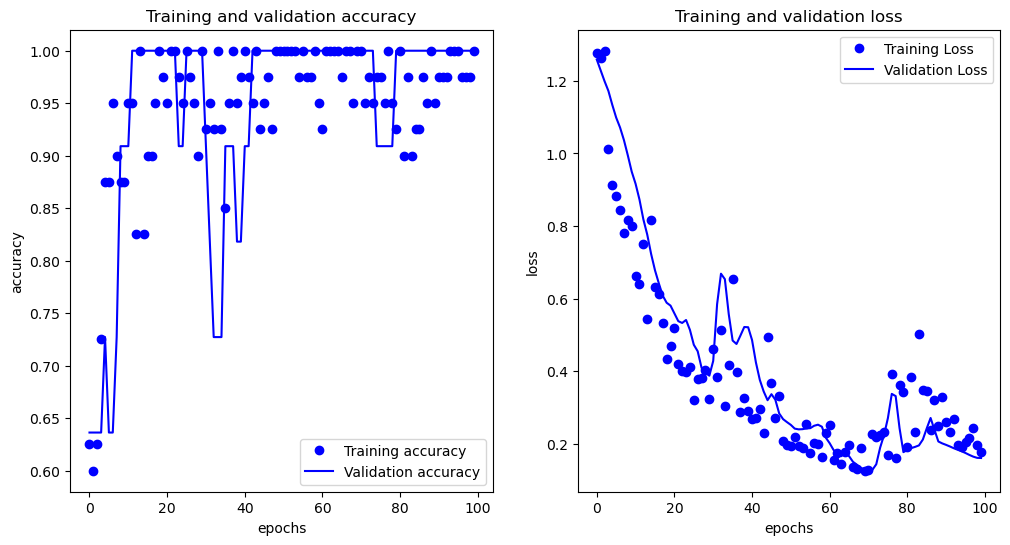

In [19]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    
    # Plotting accuracy
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    # Plotting loss
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

# After model training, you can call this function to plot the graphs:
# Assuming 'history' is the object returned from model.fit()
plot_loss_acc(history)


In [21]:
import numpy as np

# Data input baru (contoh)
# Masukkan data sesuai dengan urutan fitur Anda:
input_baru = np.array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 0]])  # Sesuaikan dengan jumlah dan urutan fitur Anda

# Normalisasi input baru menggunakan scaler yang telah dilatih sebelumnya
input_baru_scaled = scaler.transform(input_baru)

# Prediksi menggunakan model
prediksi = model.predict(input_baru_scaled)

# Menampilkan hasil prediksi
probabilitas = prediksi[0][0]
hasil_akhir = int(probabilitas > 0.5)  # Konversi probabilitas menjadi 0 atau 1

print("Probabilitas Siap Diving:", probabilitas)
print("Prediksi Siap Diving (1) atau Tidak (0):", hasil_akhir)


C:\Users\sufah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Probabilitas Siap Diving: 0.018518161
Prediksi Siap Diving (1) atau Tidak (0): 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


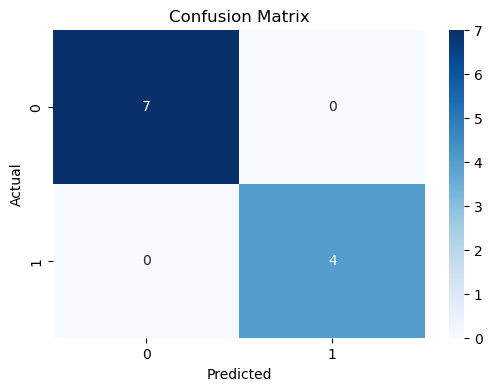

In [23]:

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Mengonversi probabilitas ke label biner (0 atau 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Menghitung confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)

# Menampilkan confusion matrix menggunakan seaborn untuk visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Simpan model ke dalam format TFLite
model.save('model_siap_diving_nn.h5')  # Simpan model Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Konversi model ke TFLite
tflite_model = converter.convert()